In [2]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk

In [3]:
# Ensure you have the necessary NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
#Reading the Review Data
data = pd.read_csv('dataset_expedia-hotels-com-reviews-scraper_2024.csv')
data.head()


,__typename,brandType,contentDirectFeedbackPromptId,customData/doWeEndorseIt,customData/hotel,hotelId,id,impressionAnalytics,impressionAnalytics/__typename,impressionAnalytics/event,...,translationInfo/loadingTranslationText,translationInfo/seeOriginalText,translationInfo/targetLocale,translationInfo/translatedBy/__typename,translationInfo/translatedBy/description,translationInfo/translationCallToActionLabel,travelers/0,travelers/1,travelers/2,travelers/3
0,PropertyReview,Expedia,NaN,no opinion,Prague Hotel Krystal,428588,66b63b958397934320ad7f75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Traveled with family and small children,Traveled with family,NaN,NaN
1,PropertyReview,Expedia,NaN,no opinion,Prague Hotel Krystal,428588,66b503566a7cfe1353bdb91e,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Traveled with family,NaN,NaN,NaN
2,PropertyReview,Expedia,NaN,no opinion,Prague Hotel Krystal,428588,66b4d8d6e6073643fd1b9cdc,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Traveled with family and small children,NaN,NaN,NaN
3,PropertyReview,Expedia,NaN,no opinion,Prague Hotel Krystal,428588,66b3c0f33677b72a4489b05f,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Traveled with family and small children,NaN,NaN,NaN
4,PropertyReview,Expedia,NaN,no opinion,Prague Hotel Krystal,428588,66b36f292fa7b179c05b6637,NaN,ClientSideImpressionEventAnalytics,Scroll reviews,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(2412, 120)

# Sentiment Analysis using NLTK Vader

In [6]:
def clean_reviews(df, min_length=10):
#Drop Na values and Strip Whitespace
    cleaned_reviews = df['text'].dropna().apply(lambda x: x.strip())

    #Filter out reviews that are too short
    cleaned_reviews = cleaned_reviews[cleaned_reviews.apply(lambda x: len(x) > min_length)]

    return cleaned_reviews.tolist()

#Clean the reviews
cleaned_reviews = clean_reviews(data)

In [7]:
cleaned_reviews[:5]

['The property was too large for my liking. The food was okay some days and not great at all some days. Definitely the food needs a upgrade especially the Italian food. The pool area was beautiful, but the pools had mold. Pools need to be cleaned better. and the Beach lets talk about the beach. Its horrible it has tons of sea weed. If you are going to this hotel for the beach forget it. reroute yourself else were. I would give this hotel a 3 out of 5. Maybe next time I would prefer the Grand. Its newer.',
 'The stuff are very friendly,Food is excellent it has variety of food and restaurants.swimming pool is good it doesn’t have a good beach in fact we couldn’t use beach due to dirty so we spent more time on swim pool',
 'Too big, no organized transportation and short staffed (get ready to wait for everything you do)',
 'That they were really pushy when it comes to selling their other resorts. For example their day pass. They kept calling the room to see why we didn’t want to go',
 'It 

Sentiment
positive    1237
negative     315
Name: count, dtype: int64


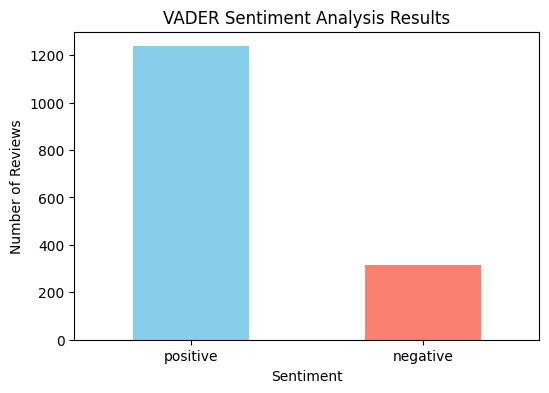

In [10]:
#Intialize VADER sentiment Analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment using VADER
vader_sentiments = []
for review in cleaned_reviews:
    score = vader_analyzer.polarity_scores(review)
    sentiment = 'positive' if score['compound'] >= 0 else 'negative'
    vader_sentiments.append(sentiment)

# Create a DatraFrame to store the results
vader_df = pd.DataFrame({'Review': cleaned_reviews, 'Sentiment': vader_sentiments})

# Display sentiment counts
print(vader_df['Sentiment'].value_counts())

# Plot the sentiment distribution
vader_df['Sentiment'].value_counts().plot(kind='bar', figsize=(6, 4), color=['skyblue', 'salmon'])
plt.title('VADER Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Sentiment Analysis using TextBlob

Sentiment
positive    1333
negative     219
Name: count, dtype: int64


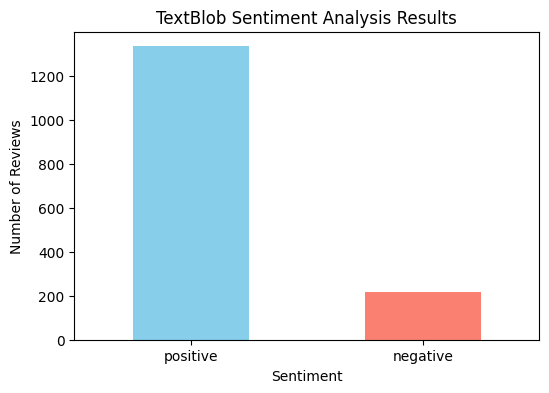

In [ ]:
from textblob import TextBlob

# Analyze sentiment using TextBlob
textblob_sentiments = []
for review in cleaned_reviews:
    analysis = TextBlob(review)
    sentiment = 'positive' if analysis.sentiment.polarity >= 0 else 'negative'
    textblob_sentiments.append(sentiment)

# Create a DataFrame to store the results
textblob_df = pd.DataFrame({'Review': cleaned_reviews, 'Sentiment': textblob_sentiments})

# Display sentiment counts
print(textblob_df['Sentiment'].value_counts())

# Visualization
textblob_df['Sentiment'].value_counts().plot(kind='bar', figsize=(6, 4), color=['skyblue', 'salmon'])
plt.title('TextBlob Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()
